# Import libraries and dataframe

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from scoring_functions import scoring_functions as f
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../project_data/complaints_processed.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['narrative'].isnull().sum()

10

## Clean up dataframe 

In [6]:
df = df.dropna()

In [7]:
df.tail()

,product,narrative
162416,debt_collection,name
162417,credit_card,name
162418,debt_collection,name
162419,credit_card,name
162420,credit_reporting,name


In [8]:
df.loc[df['narrative'] == 'name']

,product,narrative
162415,debt_collection,name
162416,debt_collection,name
162417,credit_card,name
162418,debt_collection,name
162419,credit_card,name
162420,credit_reporting,name


In [9]:
df.shape

(162411, 2)

In [10]:
df.drop(df.loc[df['narrative'] == 'name'].index, inplace=True)
df.shape

(162405, 2)

In [11]:
df.tail()

,product,narrative
162410,credit_reporting,zales comenity bank closed sold account report...
162411,retail_banking,zelle suspended account without cause banking ...
162412,debt_collection,zero contact made debt supposedly resolved fou...
162413,mortgages_and_loans,zillow home loan nmls nmls actual quote provid...
162414,debt_collection,zuntafi sent notice willing settle defaulted s...


## Change product names to integers

In [12]:
df['product'].unique()

array(['credit_card', 'retail_banking', 'credit_reporting',
       'mortgages_and_loans', 'debt_collection'], dtype=object)

In [13]:
product_dict ={'credit_reporting': 0, 'debt_collection': 1, 'mortgages_and_loans': 2, 
               'credit_card': 3, 'retail_banking': 4}

In [14]:
df['product'].replace(product_dict, inplace=True)

In [15]:
df['product'].unique()

array([3, 4, 0, 2, 1], dtype=int64)

# Train-test split

In [16]:
X = df.drop(['product'], axis=1)
y = df['product']

X_train, X_test, y_train, y_test = train_test_split(X['narrative'], y, test_size=0.20, random_state=200)

In [17]:
X_train.shape

(129924,)

In [18]:
X_test.shape

(32481,)

In [19]:
y_train.head()

6530      3
88496     3
156067    0
69566     2
123950    2
Name: product, dtype: int64

In [20]:
y_train.shape

(129924,)

# TF-IDF

## Instatiate training set

In [107]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vect_X_train = vectorizer.fit_transform(X_train)
feature_names =  vectorizer.get_feature_names()

In [22]:
vect_X_train

<129924x1712035 sparse matrix of type '<class 'numpy.float64'>'
	with 16107233 stored elements in Compressed Sparse Row format>

In [23]:
len(feature_names)

1712035

I don't think I'll need that many feature names. Going forward, I'll cut it down to 1000000 which is 58%

In [108]:
vect_X_train.shape

(129924, 1712035)

In [25]:
# vect_X_train.todense()

Don't have the memory to get it `todense()`

Use `fit_transform()` on training data and `transform()` on test data

In [110]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=1000000)
vect_X_train = vectorizer.fit_transform(X_train)
feature_names =  vectorizer.get_feature_names()

In [62]:
len(feature_names)

1000000

In [63]:
vect_X_train.shape

(129924, 1000000)

## Create model and predict

In [64]:
cls = MultinomialNB()
cls.fit(vect_X_train, y_train)

MultinomialNB()

In [65]:
y_pred = cls.predict(vectorizer.transform(X_test))

In [66]:
np.unique(y_pred)

array([0, 1, 2, 3, 4], dtype=int64)

In [35]:
# f.scoring(y_pred, y_train, cls, X_train)

In [102]:
f'The accuracy score is: {round(accuracy_score(y_test, y_pred)*100, 2)}%'

'The accuracy score is: 66.75%'

## Confusion matrix

In [68]:
confusion_matrix(y_test, y_pred)

array([[18095,    38,    19,     3,     4],
       [ 3905,   666,    27,     2,     1],
       [ 2270,    11,  1514,     5,    10],
       [ 2649,    18,     6,   480,    47],
       [ 1733,     0,    14,    39,   925]], dtype=int64)

In [111]:
vect_X_test = vectorizer.transform(X_test)

In [104]:
# this is from an old lab
def plot_c_matrix(model, X_data, y_data):
    # Generates a confusion matrix graphic
    plot_confusion_matrix(model, X_data, y_data,
#                       display_labels=["not serious", "serious"],
#                       values_format=".5g"
                         )
    plt.grid(False)
    plt.show()

In [105]:
print(y_test.shape)
print(y_pred.shape)

(32481,)
(32481,)


In [76]:
y_test.values.reshape(-1,1)

array([[0],
       [0],
       [4],
       ...,
       [1],
       [0],
       [3]], dtype=int64)

In [80]:
type(y_train)

pandas.core.series.Series

In [79]:
type(y_test)

pandas.core.series.Series

In [87]:
y_test_arr = y_test.values

In [94]:
y_pred.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [96]:
y_test_arr.reshape(-1,1)

array([[0],
       [0],
       [4],
       ...,
       [1],
       [0],
       [3]], dtype=int64)

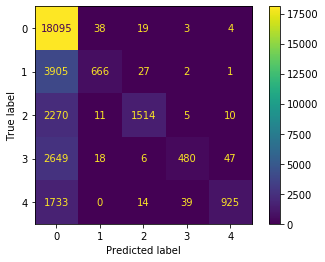

In [112]:
plot_confusion_matrix(cls, vect_X_test, y_test)

In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77     18159
           1       0.91      0.14      0.25      4601
           2       0.96      0.40      0.56      3810
           3       0.91      0.15      0.26      3200
           4       0.94      0.34      0.50      2711

    accuracy                           0.67     32481
   macro avg       0.87      0.41      0.47     32481
weighted avg       0.76      0.67      0.60     32481

